In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
from sklearn.metrics import f1_score, precision_score, recall_score
import warnings
from transformers import AutoTokenizer, AutoModelForCausalLM

warnings.filterwarnings("ignore")


In [147]:
data = pd.read_csv('eval.csv')

Text(0, 0.5, 'Losses')

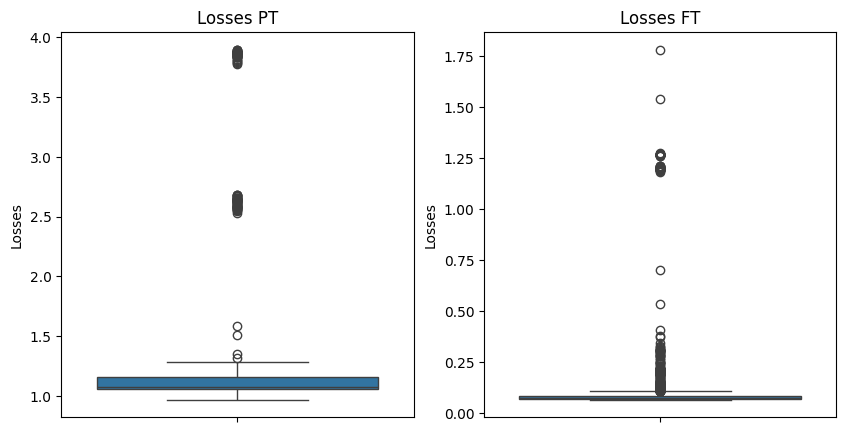

In [148]:
#two losses subplots

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

sns.boxplot( y='losses_pt', data=data, ax=ax[0])
sns.boxplot( y='losses_ft', data=data, ax=ax[1])

ax[0].set_title('Losses PT')
ax[1].set_title('Losses FT')


ax[0].set_ylabel('Losses')
ax[1].set_ylabel('Losses')

#ax[0].set_ylim(0.2, 0.75)
#ax[1].set_ylim(0.2, 0.75)

<Axes: ylabel='losses_pt'>

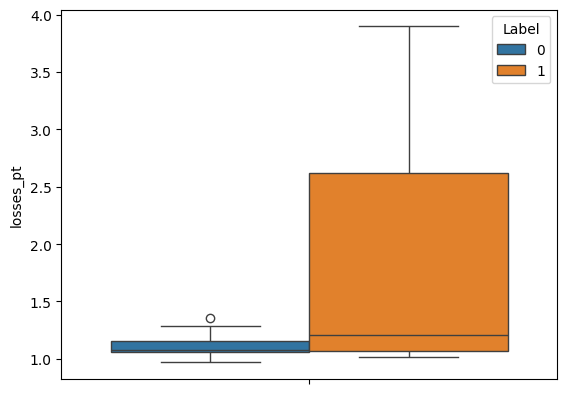

In [149]:
sns.boxplot(data=data,  y='losses_pt', hue='Label')

<Axes: ylabel='losses_ft'>

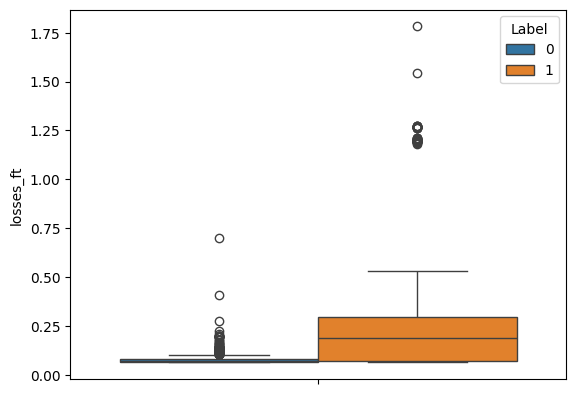

In [150]:
sns.boxplot(data=data,  y='losses_ft', hue='Label')

In [151]:
media_anomaly = data[data['Label'] == 1]['losses_pt'].mean()
media_normal = data[data['Label'] == 0]['losses_pt'].mean()

print(f'Media anomaly: {media_anomaly}')
print(f'Media normal: {media_normal}')

Media anomaly: 1.8265377108194654
Media normal: 1.1002739714763576


In [152]:
media_anomaly = data[data['Label'] == 1]['losses_ft'].mean()
media_normal = data[data['Label'] == 0]['losses_ft'].mean()

print(f'Media anomaly: {media_anomaly}')
print(f'Media normal: {media_normal}')

Media anomaly: 0.3539773984075053
Media normal: 0.07673993563596354


In [153]:
loss_model = 'losses_ft'
ths = np.linspace(0, 3, 500)
best_f1 = 0
best_th = 0

for th in ths:
    data['pred'] = data[loss_model] > th
    data['pred'] = data['pred'].astype(int)

    f1 = f1_score(data['Label'], data['pred'])
    precision = precision_score(data['Label'], data['pred'])
    recall = recall_score(data['Label'], data['pred'])

    if f1 > best_f1:
        best_f1 = f1
        best_th = th

data['pred'] = data[loss_model] > best_th
data['pred'] = data['pred'].astype(int)

f1 = f1_score(data['Label'], data['pred'])
precision = precision_score(data['Label'], data['pred'])
recall = recall_score(data['Label'], data['pred'])

print(f'Threshold: {best_th}')
print(f'F1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

KeyboardInterrupt: 

In [ ]:
#Pretrained: F1: 0.5809768637532133
#FineTuned:  F1: 0.6779661016949152

In [ ]:
from sklearn.manifold import TSNE
import umap

def load_embeddings(file_name, embeddings_key):
    data = np.load(file_name)
    return data[embeddings_key], data["labels"]

# Plot t-SNE for embeddings
def plot_tsne(embeddings, labels, title="t-SNE Plot"):
    tsne = TSNE(n_components=2, random_state=42, metric='cosine')#, perplexity=30, n_iter=1000)
    reduced_embeddings = tsne.fit_transform(embeddings)
    
    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    plt.colorbar(scatter)
    plt.title(title)
    plt.show()

# Plot UMAP for embeddings
def plot_umap(embeddings, labels, title="UMAP Plot"):
    
    reducer = umap.UMAP(n_neighbors=20, min_dist=0, metric='cosine', n_components=3)
    reduced_embeddings = reducer.fit_transform(embeddings)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings[:,0], reduced_embeddings[:,1], reduced_embeddings[:,2], c=labels, s=10, alpha=0.7)
    plt.title(title, fontsize=18)
    
    #plt.figure(figsize=(6, 4))
    #scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels, cmap='viridis', alpha=0.7)
    #plt.colorbar(scatter)
    #plt.title(title)
    plt.show()

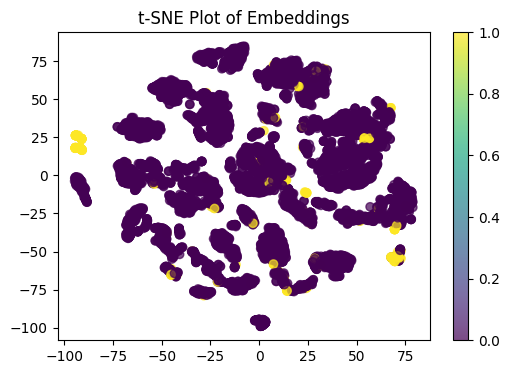

In [ ]:
embeddings, labels = load_embeddings('embeddings.npz', 'embeddings_pt')
embeddings = embeddings.reshape(embeddings.shape[0], -1)
plot_tsne(embeddings,labels, title="t-SNE Plot of Embeddings")

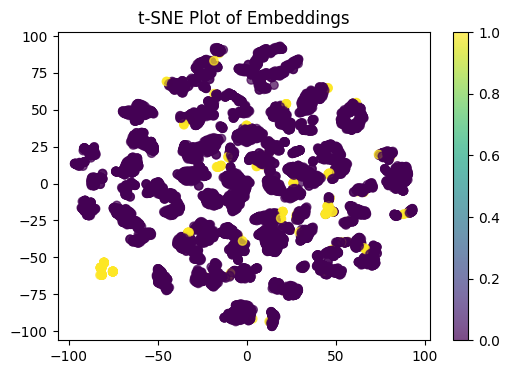

In [ ]:
embeddings, labels = load_embeddings('embeddings.npz', 'embeddings_peft')
embeddings = embeddings.reshape(embeddings.shape[0], -1)

plot_tsne(embeddings,labels, title="t-SNE Plot of Embeddings")

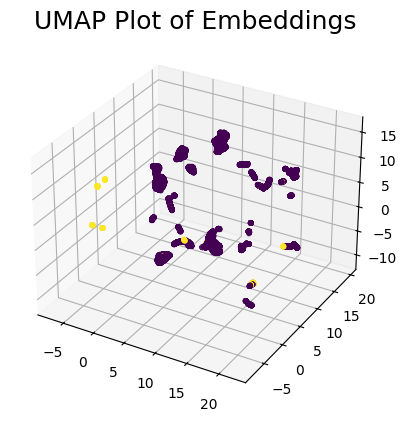

In [ ]:
embeddings, labels = load_embeddings('embeddings.npz', 'embeddings_pt')
embeddings = embeddings.reshape(embeddings.shape[0], -1)

plot_umap(embeddings,labels, title="UMAP Plot of Embeddings")

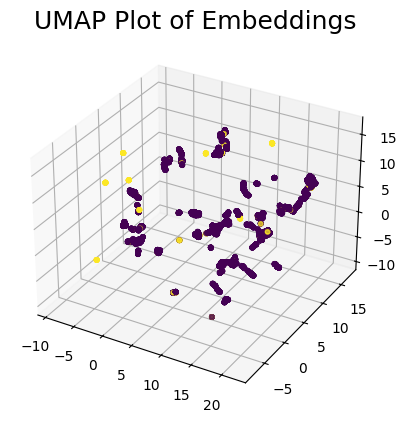

In [ ]:
embeddings, labels = load_embeddings('embeddings.npz', 'embeddings_peft')
embeddings = embeddings.reshape(embeddings.shape[0], -1)

plot_umap(embeddings,labels, title="UMAP Plot of Embeddings")

In [ ]:
data, labels = load_embeddings('embeddings.npz', 'embeddings_pt')
data = data.reshape(data.shape[0], -1)
labeled_data = data[:200]
labels_train = labels[:200]

unlabeled_data = data[200:]
labels_test = labels[200:]

#train in labeled data (MLP) and test in unlabeled data

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=1)


clf.fit(labeled_data, labels_train)

pred = clf.predict(unlabeled_data)

f1 = f1_score(labels_test, pred)
accuracy = clf.score(unlabeled_data, labels_test)
print(f'F1: {f1}')
print(f'Accuracy: {accuracy}')

F1: 0.6447638603696099
Accuracy: 0.9823469387755102


In [ ]:
data, labels = load_embeddings('embeddings.npz', 'embeddings_peft')
data = data.reshape(data.shape[0], -1)
labeled_data = data[:200]
labels_train = labels[:200]

unlabeled_data = data[200:]
labels_test = labels[200:]

#train in labeled data KNN

from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier(n_neighbors = 1)

clf.fit(labeled_data, labels_train)

pred = clf.predict(unlabeled_data)

f1 = f1_score(labels_test, pred)
accuracy = clf.score(unlabeled_data, labels_test)
print(f'F1: {f1}')
print(f'Accuracy: {accuracy}')

F1: 0.656
Accuracy: 0.9824489795918367


In [51]:
import os
import pandas as pd
from datasets import Dataset, DatasetDict
import torch
from transformers import AutoTokenizer, AutoModelForMaskedLM, TrainingArguments, Trainer, DataCollatorForLanguageModeling
from peft import LoraConfig, get_peft_model, PeftModel, PeftConfig

import json

os.environ["CUDA_VISIBLE_DEVICES"] = "2"

# Step 1: Load Dataset
dataset_path = '../.dataset/hdfs/test.csv'

nrows = 1000
data = pd.read_csv(dataset_path, nrows=nrows)
print(len(data[data['Label'] == 1]))

# Prepare dataset for Hugging Face

labels = data["Label"].tolist()
data = data["Content"].tolist()
dataset_dic = {"text": data}

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

def is_in_top_k(top_k, target):
    #implement in efficient way
    return target in top_k

def next_token_top_k(data, model, tokenizer, k):

    """
    Predict the next token for a given text using a BERT model.
    Calculate with the correct token is in the top k predictions.
    """
    accuracies = []
    model.to(device)
    for text in data["text"]:
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        inputs = {key: inputs[key].to(device) for key in inputs}

        outputs = model(**inputs)
        logits = outputs.logits

        top_k = torch.topk(logits, k, dim=-1).indices
        top_k = top_k.cpu().numpy() 
        

        #calculate the number of correct tokens in the top k predictions
        tokens = inputs['input_ids'][0].cpu().numpy()
        correct = sum(is_in_top_k(top_k[0], token) for token in tokens)
    
        
        #print(f"Correct tokens in this example: {correct}/{len(inputs['input_ids'][0])}. Accuracy: {correct/len(inputs['input_ids'][0])}")
        accuracies.append(correct/len(inputs['input_ids'][0]))
    
    return accuracies

30
cuda


In [76]:
#with smolLM
lora_path = "fl-results/experiment/round_50/global_model"

model_pretrained = AutoModelForCausalLM.from_pretrained("HuggingFaceTB/SmolLM-360M")
tokenizer = AutoTokenizer.from_pretrained("HuggingFaceTB/SmolLM-360M")
tokenizer.pad_token = tokenizer.eos_token

model_ft = PeftModel.from_pretrained(model_pretrained, lora_path)
model_ft.to(device)

accuracies = next_token_top_k(dataset_dic, model_ft, tokenizer, 15)

df_results = pd.DataFrame({"accuracy": accuracies, "label": labels})

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [77]:
df_results[df_results['label'] == 1]['accuracy'].mean()

np.float64(0.986804662041267)

In [78]:
df_results[df_results['label'] == 0]['accuracy'].mean()

np.float64(1.0)

(0.96, 1.0)

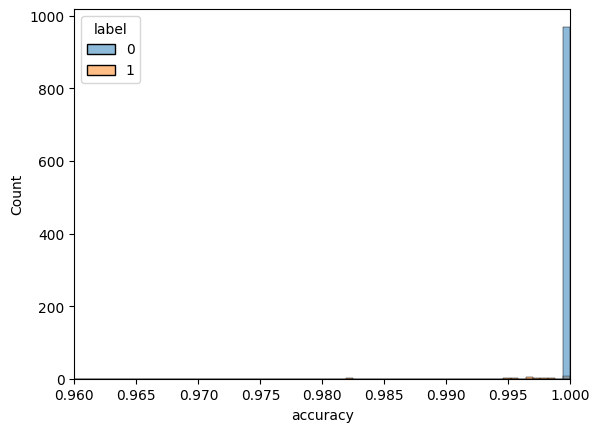

In [79]:
sns.histplot(df_results, x='accuracy', hue='label', bins=100)
plt.xlim(0.96, 1)

In [80]:
ths = np.linspace(0, 1, 1000)

best_f1 = 0
best_th = 0

for th in ths:
    df_results['pred'] = df_results['accuracy'] < th
    df_results['pred'] = df_results['pred'].astype(int)

    f1 = f1_score(df_results['label'], df_results['pred'])
    precision = precision_score(df_results['label'], df_results['pred'])
    recall = recall_score(df_results['label'], df_results['pred'])

    if f1 > best_f1:
        best_f1 = f1
        best_th = th


df_results['pred'] = df_results['accuracy'] < best_th
df_results['pred'] = df_results['pred'].astype(int)

f1 = f1_score(df_results['label'], df_results['pred'])
precision = precision_score(df_results['label'], df_results['pred'])
recall = recall_score(df_results['label'], df_results['pred'])

print(f'Threshold: {best_th}')
print(f'F1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Threshold: 0.998998998998999
F1: 0.8679245283018868
Precision: 1.0
Recall: 0.7666666666666667


In [81]:
#using median - std as the trehshold (independent of hyperparameters tuning)
th = np.median(df_results['accuracy']) - np.std(df_results['accuracy'])

df_results['pred'] = df_results['accuracy'] < th

f1 = f1_score(df_results['label'], df_results['pred'])
precision = precision_score(df_results['label'], df_results['pred'])
recall = recall_score(df_results['label'], df_results['pred'])

print(f'Threshold: {th}')
print(f'F1: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Threshold: 0.995745169531199
F1: 0.5714285714285714
Precision: 1.0
Recall: 0.4


In [17]:

#using k = 3 ------------------------------
#WO FT
#Threshold: 0.6896896896896897
#F1: 0.5072046109510087
#Precision: 1.0
#Recall: 0.33976833976833976

#With FT
#Threshold: 0.9669669669669669
#F1: 0.7863894139886578
#Precision: 0.7703703703703704
#Recall: 0.803088803088803

#using k = 5 ------------------------------
#WO FT
#Threshold: 0.994994994994995
#F1: 0.6854663774403471
#Precision: 0.7821782178217822
#Recall: 0.61003861003861

#With FT
#Threshold: 0.996996996996997
#F1: 0.9140767824497258
#Precision: 0.8680555555555556
#Recall: 0.9652509652509652

#using k = 10 ------------------------------
#WO FT
#Threshold: 0.994994994994995
#F1: 0.6086956521739131
#Precision: 0.9015151515151515
#Recall: 0.4594594594594595

#With FT
#Threshold: 0.997997997997998
#F1: 0.8770642201834863
#Precision: 0.8356643356643356
#Recall: 0.9227799227799228
